In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numba import jit

# Zadanie 1

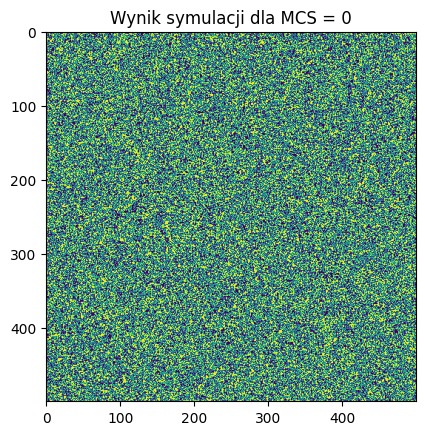

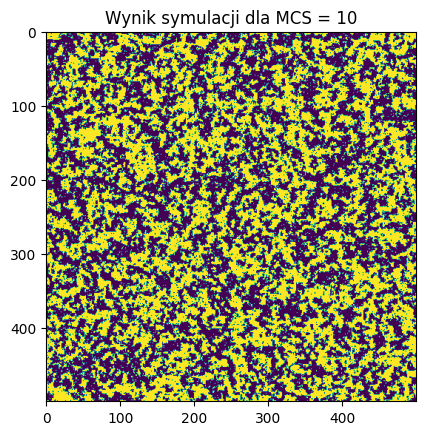

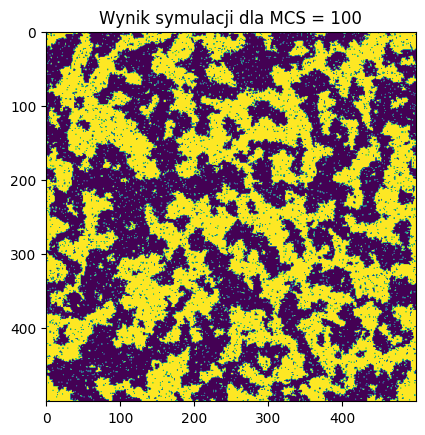

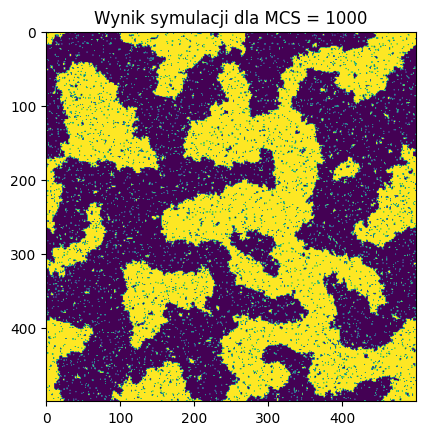

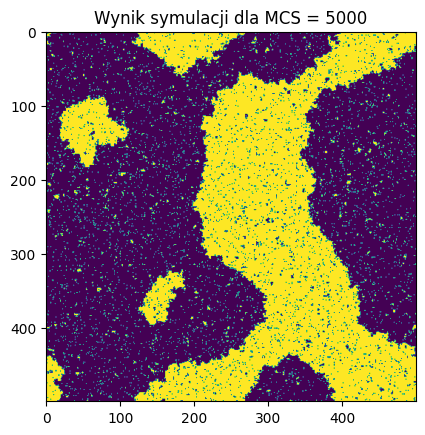

In [9]:
# update lattice with one MCS step

@jit(nopython = True)
def update_lattice(temp, lattice):

    dim = len(lattice[0, :])
    J = 1 

    for timer in range(dim**2):

        # choice of a point

        i = np.random.randint(dim**2)
        x = np.array((i // dim, i % dim ))

        # summing spin from neighbors

        spins_summed = lattice[(x[0] + 1) % dim, x[1]] + lattice[(x[0] - 1) % dim, x[1]] + lattice[x[0], (x[1] + 1) % dim] + lattice[x[0], (x[1] - 1) % dim]

        # change of energy

        spin = lattice[x[0], x[1]]
        energy = 2 * J * spin * spins_summed

        # let's flip the spin

        if energy <= 0:
            lattice[x[0], x[1]] = -spin
        else:
            r = np.random.rand()
            if r < np.exp(-energy / temp):
                lattice[x[0], x[1]] = -spin

# Calculations and plot
lattices = []
lattice = np.empty([500, 500])
for i in range(500**2):
    lattice[i % 500, i // 500] = np.random.choice([-1, 1])

for steps in range(5001):
    if steps in [0, 10, 100, 1000, 5000]:
        lattices.append(lattice.copy())
        plt.imshow(lattice)
        plt.title("Wynik symulacji dla MCS = %i" %steps)
        plt.show()
    update_lattice(2, lattice)

# Zadanie 2

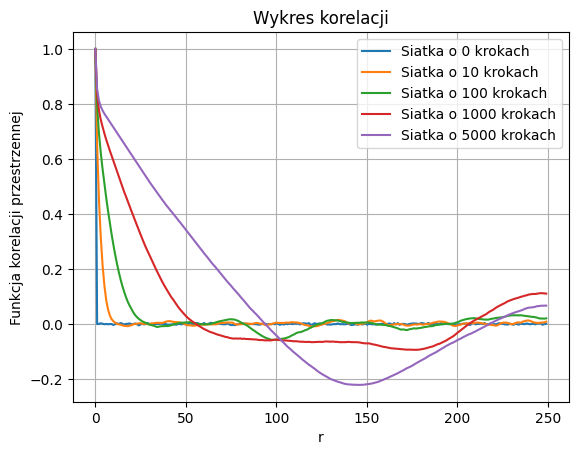

In [40]:
@jit
def space_corr(lattice, r):
    dim = len(lattice[:, 0])
    row_corr = []
    for row in range(dim):
        sum = 0
        for i in range(dim):
            sum += lattice[row, i] * lattice[row, (i + r) % dim]
        row_corr.append(sum / dim)
    sum2 = 0
    for i in range(dim):
        sum2 += row_corr[i] / dim
    return sum2

num = [0, 10, 100, 1000, 5000]
opis = []
for i in 0, 1, 2, 3, 4:
    X = np.arange(250)
    Y = []
    for x in X:
        Y.append(space_corr(lattices[i], x))
    plt.plot(X, Y)
    opis.append("Siatka o %i krokach" %num[i])
    plt.title("Wykres korelacji")
    plt.legend(opis)
plt.xlabel("r")
plt.ylabel("Funkcja korelacji przestrzennej")
plt.grid()
plt.show()